In [ ]:
pip install gdown==v4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [4]:
!gdown 19xU3kUyivRWGQzYXnpwlIjQqdfkD56v4

Downloading...
From: https://drive.google.com/uc?id=19xU3kUyivRWGQzYXnpwlIjQqdfkD56v4
To: /content/twitter_data.csv
100% 10.3M/10.3M [00:00<00:00, 178MB/s]


In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/twitter_data.csv')

In [6]:
data

,id,user,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
data.isnull().sum()

id             0
user           0
sentiment      0
tweet        686
dtype: int64

In [9]:
data = data.drop(columns=['id','user'], axis=1)

In [10]:
data

,sentiment,tweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [11]:
data= data.dropna(subset='tweet')

In [ ]:
#data.isnull().sum()

<Axes: >

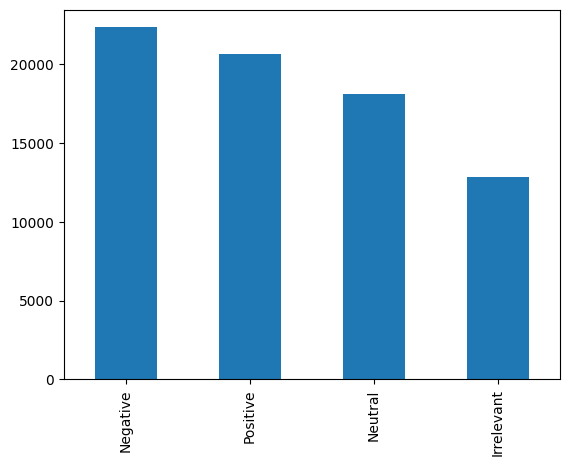

In [12]:
data['sentiment'].value_counts().plot.bar()

In [ ]:
data['text_length'] = data['tweet'].apply(len) #adding a new column that shows the length of each tweet

In [ ]:
#data['text_length'].hist()

In [ ]:
X = data['tweet']
Y = pd.get_dummies(data['sentiment']) #Y (targetot) ni se vsusnost 4 encodirani koloni od vrednostite vo sentiment

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
data['num_words'] = data['tweet'].apply(lambda x: len(x.split(" "))) #nova kolona vo koja ke go imame brojot na zborovi za sekoj tweet

In [ ]:
# max_tokens = 64 # used to set a maximum length for the input sequences. If a text sequence has more tokens than the specified max_tokens, it will be truncated or padded to fit the specified length.

In [ ]:
data['num_words'].mean()

19.40641386020866

In [ ]:
max_tokens=19

In [ ]:
tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
len_tokens = [len(token_list) for token_list in X_train]

(array([2.3694e+04, 1.7321e+04, 9.1800e+03, 5.0600e+03, 2.4430e+03,
        1.0590e+03, 3.4600e+02, 7.7000e+01, 1.4000e+01, 2.0000e+00]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

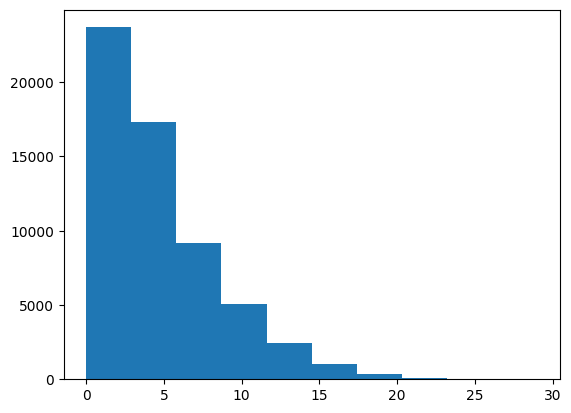

In [ ]:
plt.hist(len_tokens)

In [ ]:
# maxlen=16 #refers to the maximum length of sequences, specifically the maximum number of tokens (words or subword units) allowed in a sequence. This parameter is often used when dealing with variable-length text data to ensure that all sequences have a consistent length for model input.

In [ ]:
data['text_length'].mean()

108.78365046759285

In [ ]:
maxlen=109

In [ ]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [ ]:
X_train.shape, X_test.shape

((59196, 109), (14800, 109))

**Creating the model**

In [ ]:
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
num_classes = len(Y.columns)

In [ ]:
model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=10)

Epoch 1/10
740/740 [==============================] - 63s 78ms/step - loss: 1.3441 - precision: 0.5218 - recall: 0.0137 - val_loss: 1.3278 - val_precision: 0.5156 - val_recall: 0.0420
Epoch 2/10
740/740 [==============================] - 57s 77ms/step - loss: 1.3294 - precision: 0.5324 - recall: 0.0278 - val_loss: 1.3194 - val_precision: 0.5328 - val_recall: 0.0459
Epoch 3/10
740/740 [==============================] - 57s 77ms/step - loss: 1.3211 - precision: 0.5604 - recall: 0.0388 - val_loss: 1.3120 - val_precision: 0.5497 - val_recall: 0.0476
Epoch 4/10
740/740 [==============================] - 58s 79ms/step - loss: 1.3124 - precision: 0.5820 - recall: 0.0469 - val_loss: 1.3072 - val_precision: 0.5955 - val_recall: 0.0332
Epoch 5/10
740/740 [==============================] - 56s 76ms/step - loss: 1.3046 - precision: 0.5972 - recall: 0.0544 - val_loss: 1.3010 - val_precision: 0.5727 - val_recall: 0.0642
Epoch 6/10
740/740 [==============================] - 56s 75ms/step - loss: 1.29

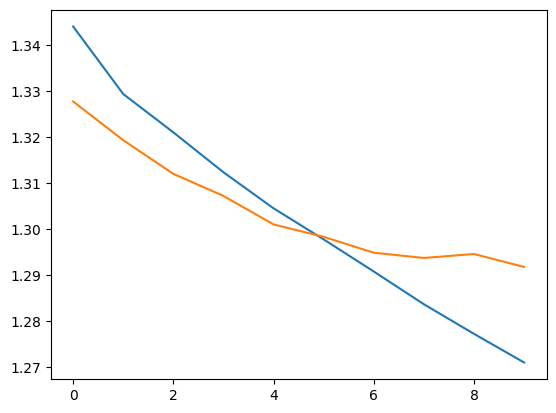

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

In [ ]:
preds = model.predict(X_test)

463/463 [==============================] - 5s 9ms/step


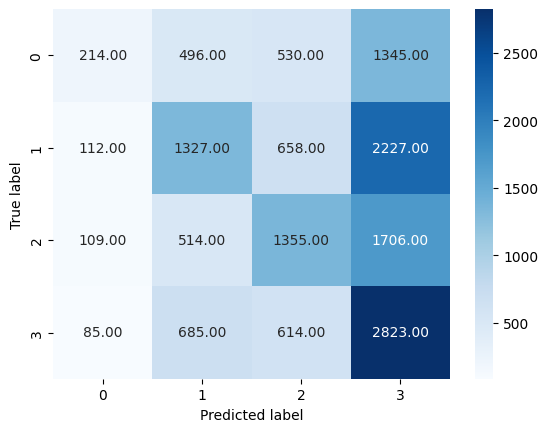

In [ ]:
confmat = confusion_matrix(np.argmax(Y_test.values, axis=1), np.argmax(preds, axis=1))
sns.heatmap(confmat, annot=True, cmap='Blues', fmt='5.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()